In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from matplotlib import cm
%matplotlib inline

In [3]:
dataset=pd.read_csv("Data.csv")
dataset=dataset.drop(['Sample code number'],axis=1)

In [4]:
dataset

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


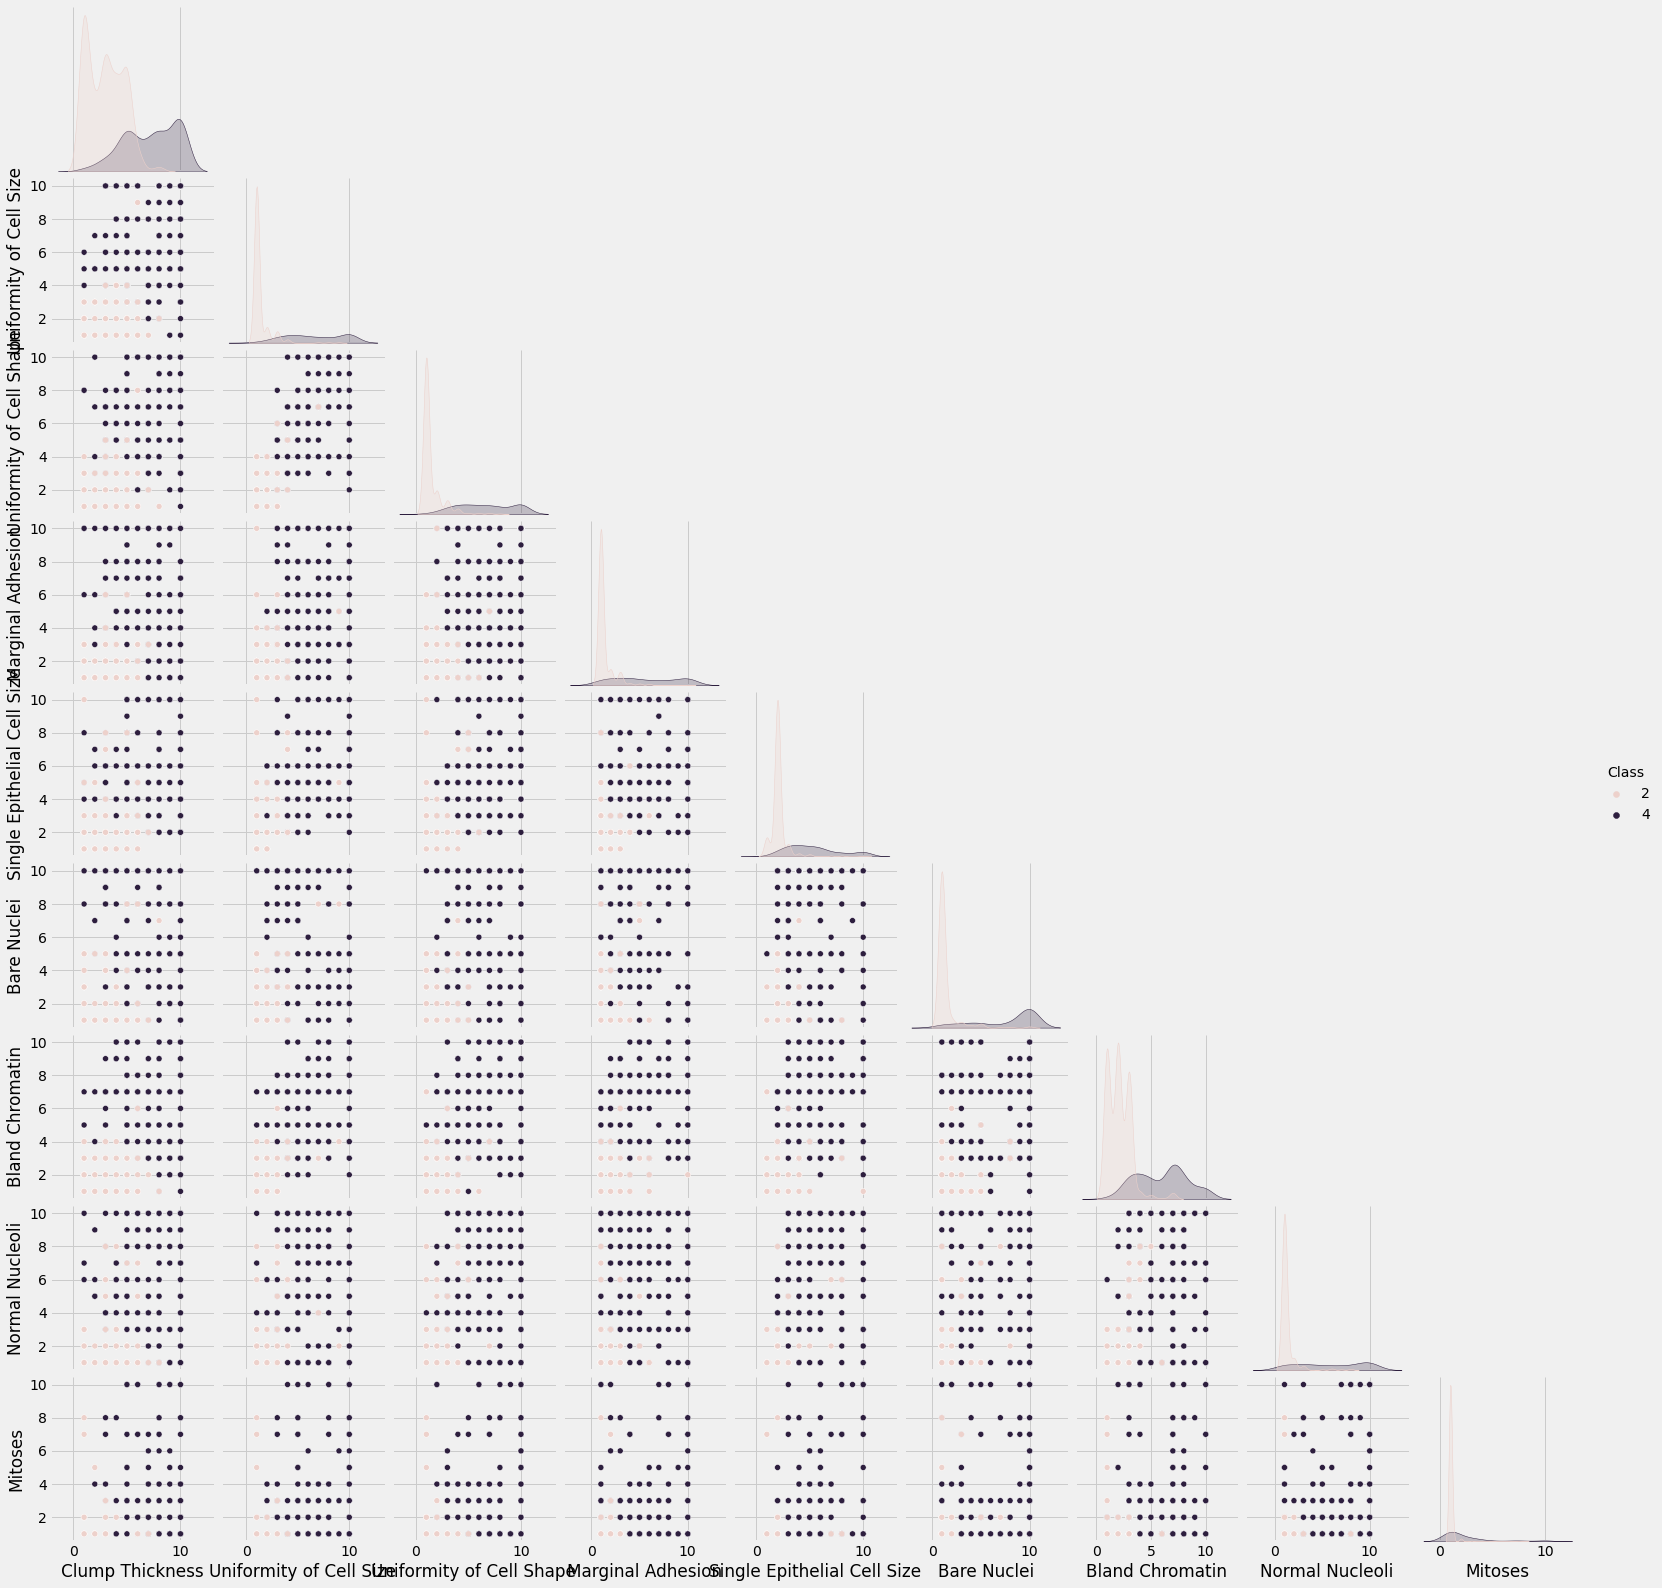

In [5]:
plt.style.use("fivethirtyeight")
sns.pairplot(dataset,hue="Class",corner=True)
plt.show()

In [6]:
mask=np.zeros_like(dataset.corr())
trai=np.triu_indices_from(mask)
mask[trai]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

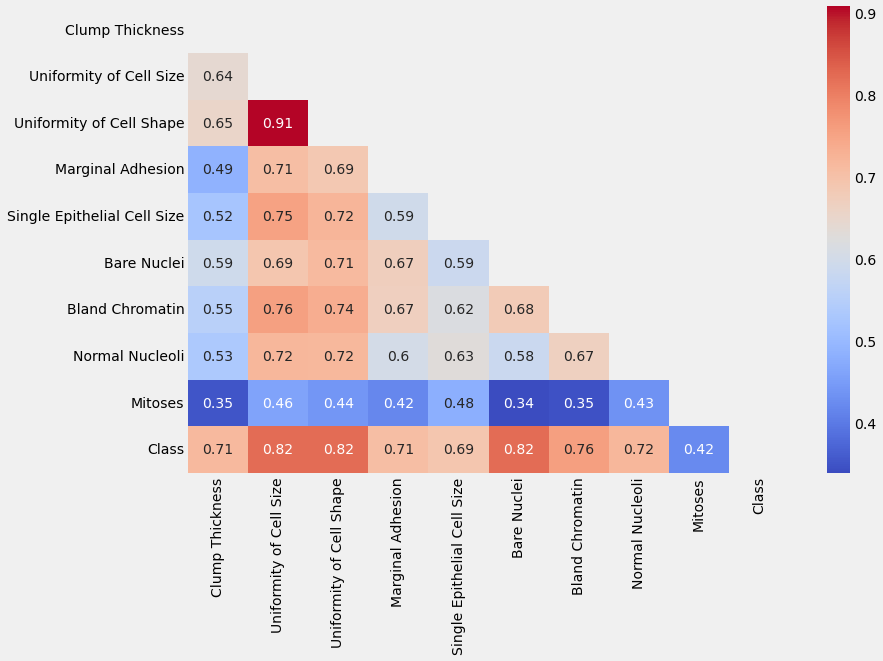

In [7]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
sns.heatmap(data=dataset.corr(),mask=mask,annot=True,cmap=cm.coolwarm)
plt.show()

<AxesSubplot:>

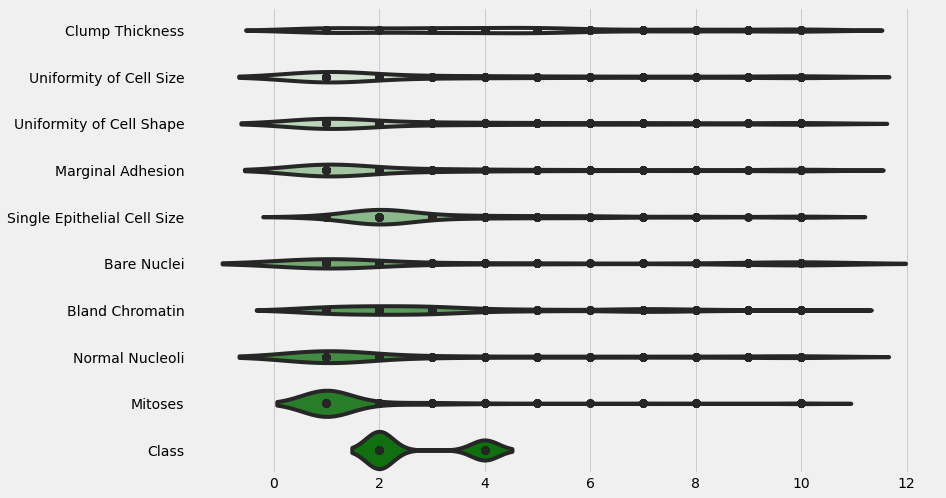

In [8]:
plt.figure(figsize=(12,8))
sns.violinplot(data=dataset,palette="light:g", inner="points", orient="h")

<AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='Clump Thickness'>

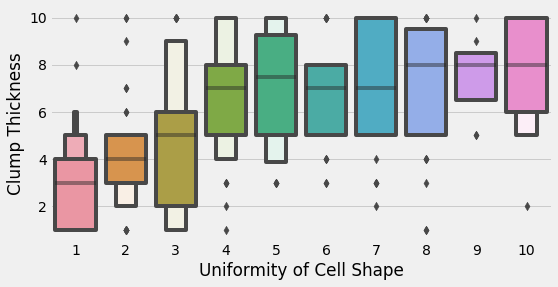

In [9]:
plt.figure(figsize=(8,4))
sns.boxenplot(data=dataset,x="Uniformity of Cell Shape",y="Clump Thickness")

In [10]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

# Spliting and feature sclaing

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
table=[]

In [56]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
cm=confusion_matrix(y_test,knn.predict(x_test))
table.append(["KNeighborsClassifier",accuracy_score(y_test,knn.predict(x_test))])
print(cm)
accuracy_score(y_test,knn.predict(x_test))

[[84  3]
 [ 1 49]]


0.9708029197080292

In [57]:
randforest=RandomForestClassifier(random_state=0)
randforest.fit(x_train,y_train)
cm=confusion_matrix(y_test,randforest.predict(x_test))
table.append(["RandomForestClassifier",accuracy_score(y_test,randforest.predict(x_test))])
print(cm)
accuracy_score(y_test,randforest.predict(x_test))

[[84  3]
 [ 1 49]]


0.9708029197080292

In [58]:
log=LogisticRegressionCV(random_state=0)
log.fit(x_train,y_train)
cm=confusion_matrix(y_test,log.predict(x_test))
table.append(["LogisticRegressionCV",accuracy_score(y_test,log.predict(x_test))])
print(cm)
accuracy_score(y_test,log.predict(x_test))

[[84  3]
 [ 3 47]]


0.9562043795620438

In [59]:
naiv=GaussianNB()
naiv.fit(x_train,y_train)
cm=confusion_matrix(y_test,naiv.predict(x_test))
table.append(["GaussianNB",accuracy_score(y_test,naiv.predict(x_test))])
print(cm)
accuracy_score(y_test,naiv.predict(x_test))

[[80  7]
 [ 0 50]]


0.948905109489051

In [60]:
gradclas=GradientBoostingClassifier()
gradclas.fit(x_train,y_train)
cm=confusion_matrix(y_test,gradclas.predict(x_test))
table.append(["GradientBoostingClassifier",accuracy_score(y_test,gradclas.predict(x_test))])
print(cm)
accuracy_score(y_test,gradclas.predict(x_test))

[[84  3]
 [ 2 48]]


0.9635036496350365

In [61]:
nonLinearsvm=SVC(kernel='rbf')
nonLinearsvm.fit(x_train,y_train)
cm=confusion_matrix(y_test,nonLinearsvm.predict(x_test))
table.append(["SVCnonLinearkernal",accuracy_score(y_test,nonLinearsvm.predict(x_test))])
print(cm)
accuracy_score(y_test,nonLinearsvm.predict(x_test))

[[83  4]
 [ 1 49]]


0.9635036496350365

In [69]:
table=pd.DataFrame(table,columns=["model","score"])
table

,model,score
0,KNeighborsClassifier,0.970803
1,RandomForestClassifier,0.970803
2,LogisticRegressionCV,0.956204
3,GaussianNB,0.948905
4,GradientBoostingClassifier,0.963504
5,SVCnonLinearkernal,0.963504


<AxesSubplot:>

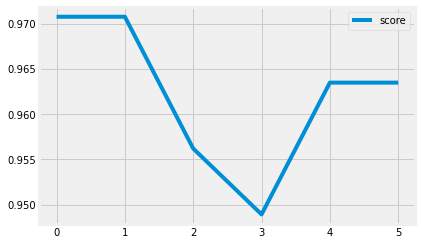

In [83]:
table.plot()

<AxesSubplot:xlabel='model', ylabel='score'>

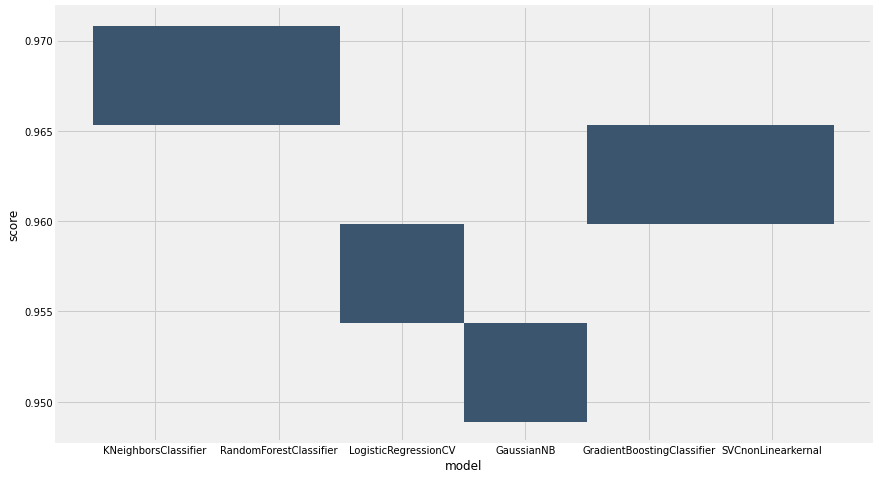

In [84]:
plt.figure(figsize=(13,8))
sns.histplot(y=table.score,x=table.model)